# Implementing MLPs with Keras
## Classification MLP using Sequential API

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.typing import ArrayLike
from typing import Callable
from time import strftime
import keras_tuner as kt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

In [5]:
# normalization
X_train = X_train / 255
X_test = X_test / 255
X_valid = X_valid / 255

In [6]:
class_names = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [7]:
class_names[y_train[0]]

'Ankle boot'

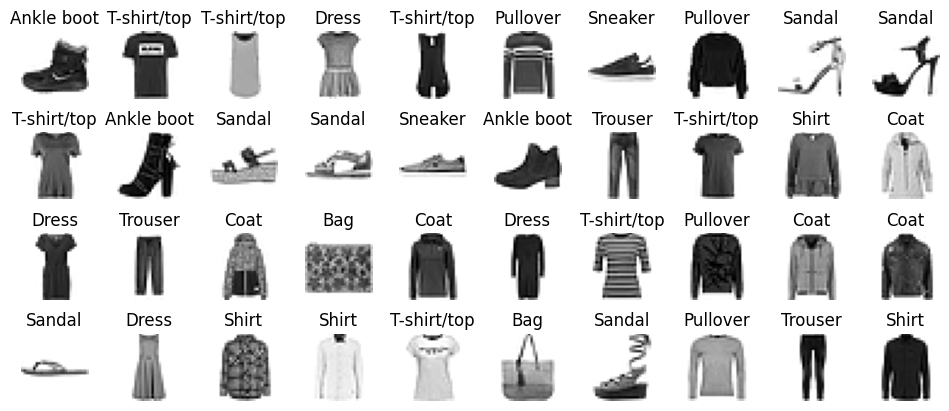

In [8]:
n_rows: int = 4
n_cols: int = 10
plt.figure(figsize= (n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index: int = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap= "binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
        
plt.subplots_adjust(wspace= 0.2, hspace= 0.5)
plt.show()

In [9]:
tf.random.set_seed(42)
model_clf = tf.keras.Sequential()
model_clf.add(tf.keras.layers.Input(shape= [28, 28]))
model_clf.add(tf.keras.layers.Flatten())
model_clf.add(tf.keras.layers.Dense(300, activation= 'relu'))
model_clf.add(tf.keras.layers.Dense(100, activation= 'relu'))
model_clf.add(tf.keras.layers.Dense(10, activation= 'softmax'))

# same thing
# model_2 = tf.keras.Sequential([
#     tf.keras.layers.Input(shape= (28, 28)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(300, activation= 'relu'),
#     tf.keras.layers.Dense(100, activation= 'relu'),
#     tf.keras.layers.Dense(10, activation= 'softmax')
# ])

In [10]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

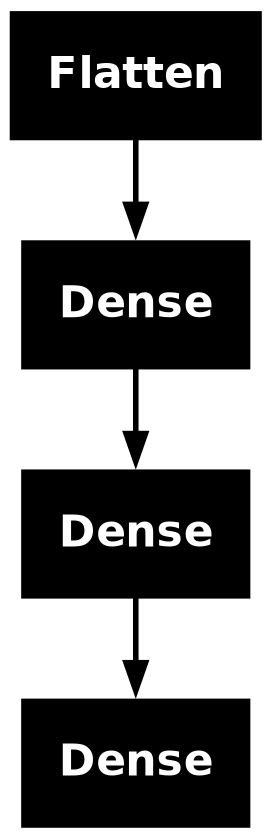

In [11]:
tf.keras.utils.plot_model(model_clf)

In [12]:
model_clf.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
hidden_layer_1 = model_clf.layers[1]
hidden_layer_1.name

'dense'

In [14]:
model_clf.get_layer('dense') is hidden_layer_1

True

In [15]:
weights, biases = hidden_layer_1.get_weights()

In [16]:
weights

array([[-0.02534276, -0.02293382, -0.07005197, ...,  0.02064771,
        -0.01511497, -0.04030195],
       [ 0.0507441 , -0.0743168 ,  0.06177397, ...,  0.01099367,
         0.06558013,  0.00684403],
       [ 0.01527762, -0.04370791, -0.03650546, ...,  0.02976248,
        -0.0024916 , -0.04646888],
       ...,
       [-0.03303675,  0.00991005,  0.0534953 , ..., -0.0161221 ,
        -0.05498339,  0.0256829 ],
       [ 0.06968792, -0.00765053,  0.02329858, ..., -0.01641591,
         0.05379346,  0.04167892],
       [-0.05606586,  0.06771716,  0.05007859, ...,  0.04461161,
         0.07101172, -0.05093093]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
model_clf.compile(
    optimizer= 'sgd', 
    metrics= ['accuracy'], 
    loss= 'sparse_categorical_crossentropy'
)

In [21]:
history = model_clf.fit(X_train, y_train, epochs = 30, validation_data= (X_valid, y_valid))

Epoch 1/30


I0000 00:00:1731151433.306058     100 service.cc:145] XLA service 0x7abd24006060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731151433.306118     100 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 112/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4117 - loss: 1.8621

I0000 00:00:1731151434.107685     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6962 - loss: 0.9576 - val_accuracy: 0.8242 - val_loss: 0.5076
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8269 - loss: 0.5033 - val_accuracy: 0.8374 - val_loss: 0.4573
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8446 - loss: 0.4511 - val_accuracy: 0.8484 - val_loss: 0.4324
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8543 - loss: 0.4210 - val_accuracy: 0.8504 - val_loss: 0.4158
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.3990 - val_accuracy: 0.8550 - val_loss: 0.4031
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8663 - loss: 0.3816 - val_accuracy: 0.8560 - val_loss: 0.3954
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3672 - val_accuracy: 0.8600 - val_loss: 0.3873
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8748 - loss: 0.3546 - val_accurac

In [22]:
history.history

{'accuracy': [0.7703272700309753,
  0.8317636251449585,
  0.8463272452354431,
  0.8551272749900818,
  0.8614363670349121,
  0.866527259349823,
  0.8715817928314209,
  0.8758545517921448,
  0.8796545267105103,
  0.8828181624412537,
  0.8857272863388062,
  0.8884363770484924,
  0.8906000256538391,
  0.8930000066757202,
  0.8952181935310364,
  0.897527277469635,
  0.899581789970398,
  0.9017454385757446,
  0.9041818380355835,
  0.9059454798698425,
  0.9081636071205139,
  0.9094363451004028,
  0.9111636281013489,
  0.912745475769043,
  0.9143636226654053,
  0.9161454439163208,
  0.9173818230628967,
  0.9190545678138733,
  0.9203818440437317,
  0.9220181703567505],
 'loss': [0.6994044780731201,
  0.4854225516319275,
  0.4412684738636017,
  0.41391822695732117,
  0.39363545179367065,
  0.3771818280220032,
  0.3633880317211151,
  0.3512572944164276,
  0.3406198024749756,
  0.3309627175331116,
  0.32216373085975647,
  0.31404367089271545,
  0.306418240070343,
  0.29941803216934204,
  0.2928213

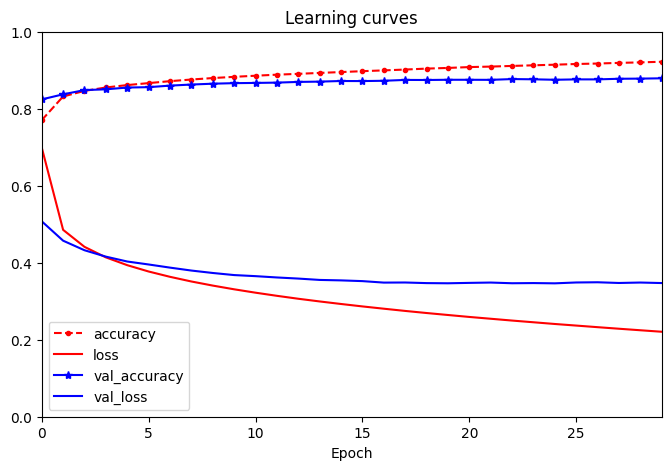

In [23]:
pd.DataFrame(history.history).plot(
    figsize= (8, 5), 
    xlim= [0, 29], 
    ylim= [0, 1], 
    style= ['r--.', 'r-', 'b-*', 'b-'], 
    xlabel= 'Epoch',
    title= 'Learning curves'
)
plt.show()

In [24]:
history = model_clf.fit(X_train, y_train, epochs = 30, validation_data= (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9237 - loss: 0.2174 - val_accuracy: 0.8802 - val_loss: 0.3436
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9248 - loss: 0.2135 - val_accuracy: 0.8796 - val_loss: 0.3444
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9268 - loss: 0.2099 - val_accuracy: 0.8802 - val_loss: 0.3446
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9283 - loss: 0.2063 - val_accuracy: 0.8808 - val_loss: 0.3446
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9297 - loss: 0.2029 - val_accuracy: 0.8816 - val_loss: 0.3430
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9309 - loss: 0.1995 - val_accuracy: 0.8810 - val_loss: 0.3436
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9330 - loss: 0.1962 - val_accuracy: 0.8812 - val_loss: 0.3446
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9343 - loss: 0.1927 - 

In [25]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8789 - loss: 0.4034


[0.39205417037010193, 0.879800021648407]

In [26]:
predictions = model_clf.predict(X_test[:3]).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [27]:
predictions

array([[0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.9],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]], dtype=float32)

In [28]:
class_names[predictions.argmax(axis= 1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
class_names[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Regression MLP using Sequential API

In [30]:
housing = tf.keras.datasets.california_housing.load_data()
(X_train_housing, y_train_housing), (X_test_housing, y_test_housing) = housing

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [31]:
norm_layer = tf.keras.layers.Normalization()

reg_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= X_train_housing.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

reg_model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3),
    metrics= ['RootMeanSquaredError'],
    loss= 'mse'
)

norm_layer.adapt(X_train_housing)

In [32]:
history = reg_model.fit(X_train_housing, y_train_housing, epochs= 20, validation_split= 0.1)

Epoch 1/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - RootMeanSquaredError: 232741.5938 - loss: 54187175936.0000 - val_RootMeanSquaredError: 160415.3125 - val_loss: 25733072896.0000
Epoch 2/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 128567.2969 - loss: 16655642624.0000 - val_RootMeanSquaredError: 97808.1562 - val_loss: 9566436352.0000
Epoch 3/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 96039.2422 - loss: 9229832192.0000 - val_RootMeanSquaredError: 85983.0781 - val_loss: 7393090048.0000
Epoch 4/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 85099.1719 - loss: 7245022720.0000 - val_RootMeanSquaredError: 78994.4531 - val_loss: 6240123904.0000
Epoch 5/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 78324.1875 - loss: 6136567808.0000 - val_RootMeanSquaredError: 74407.4766 - val_loss: 5536472576.0000
Epoch 6/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 73791.9219 - loss: 544667392

In [33]:
mse, rmse = reg_model.evaluate(X_test_housing, y_test_housing)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 69013.9219 - loss: 4764509184.0000


In [34]:
mse

4525274624.0

In [35]:
rmse

67270.15625

In [36]:
reg_model.predict(X_test_housing[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


array([[226898.28],
       [289025.94],
       [189677.23]], dtype=float32)

## Building Complex Models Using the Functional API

In [37]:
normalize_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation= 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation= 'relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape= X_train_housing.shape[1:])
normalize = normalize_layer(input_)
hidden_1 = hidden_layer1(normalize)
hidden_2 = hidden_layer2(hidden_1)
concat = concat_layer([hidden_2, normalize])
output = output_layer(concat)

model = tf.keras.Model(inputs= [input_], outputs= [output])

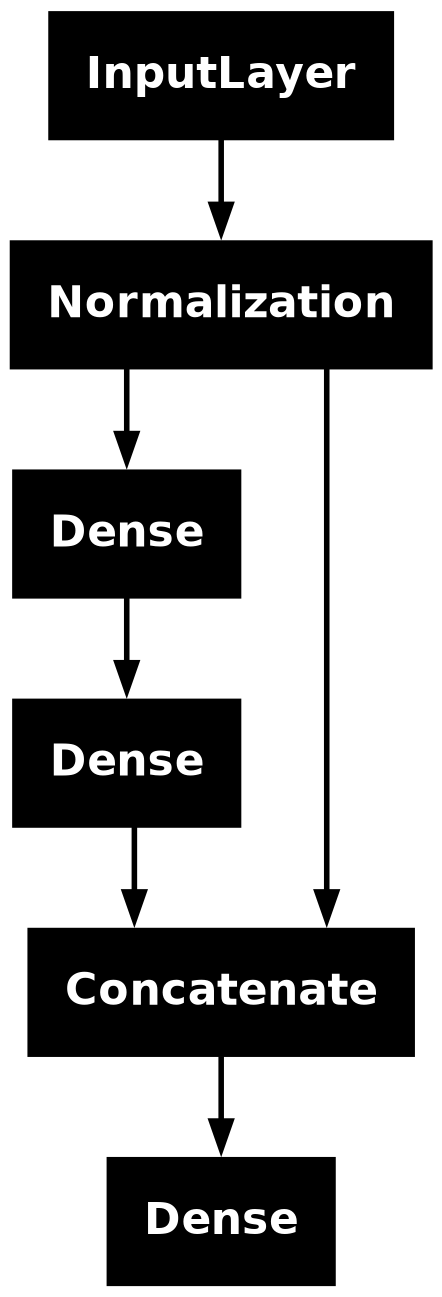

In [38]:
tf.keras.utils.plot_model(model)

In [39]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3),
    metrics= ['RootMeanSquaredError'],
    loss= 'mse'
)

normalize_layer.adapt(X_train_housing)

In [40]:
model.fit(X_train_housing, y_train_housing, epochs= 10, validation_split= 0.1)

Epoch 1/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 235940.8750 - loss: 55669133312.0000 - val_RootMeanSquaredError: 239918.2031 - val_loss: 57560743936.0000
Epoch 2/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 234376.4375 - loss: 54933377024.0000 - val_RootMeanSquaredError: 234636.0312 - val_loss: 55054065664.0000
Epoch 3/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 227407.8750 - loss: 51717017600.0000 - val_RootMeanSquaredError: 222132.2188 - val_loss: 49342722048.0000
Epoch 4/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 213117.3906 - loss: 45425676288.0000 - val_RootMeanSquaredError: 202384.5781 - val_loss: 40959520768.0000
Epoch 5/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 192238.9375 - loss: 36966838272.0000 - val_RootMeanSquaredError: 177883.4062 - val_loss: 31642507264.0000
Epoch 6/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 167997.2812 - 

In [41]:
norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(30, activation= 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation= 'relu')

concat_layer = tf.keras.layers.Concatenate()

output_layer = tf.keras.layers.Dense(1)

input_wide = tf.keras.layers.Input(shape= [5], name= 'input_wide')
input_deep = tf.keras.layers.Input(shape= [6], name= 'input_deep')

norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)

hidden_1 = hidden_layer1(norm_deep)
hidden_2 = hidden_layer2(hidden_1)

concat = concat_layer([hidden_2, norm_wide])

output = output_layer(concat)

model = tf.keras.Model(inputs= [input_wide, input_deep], outputs= [output])

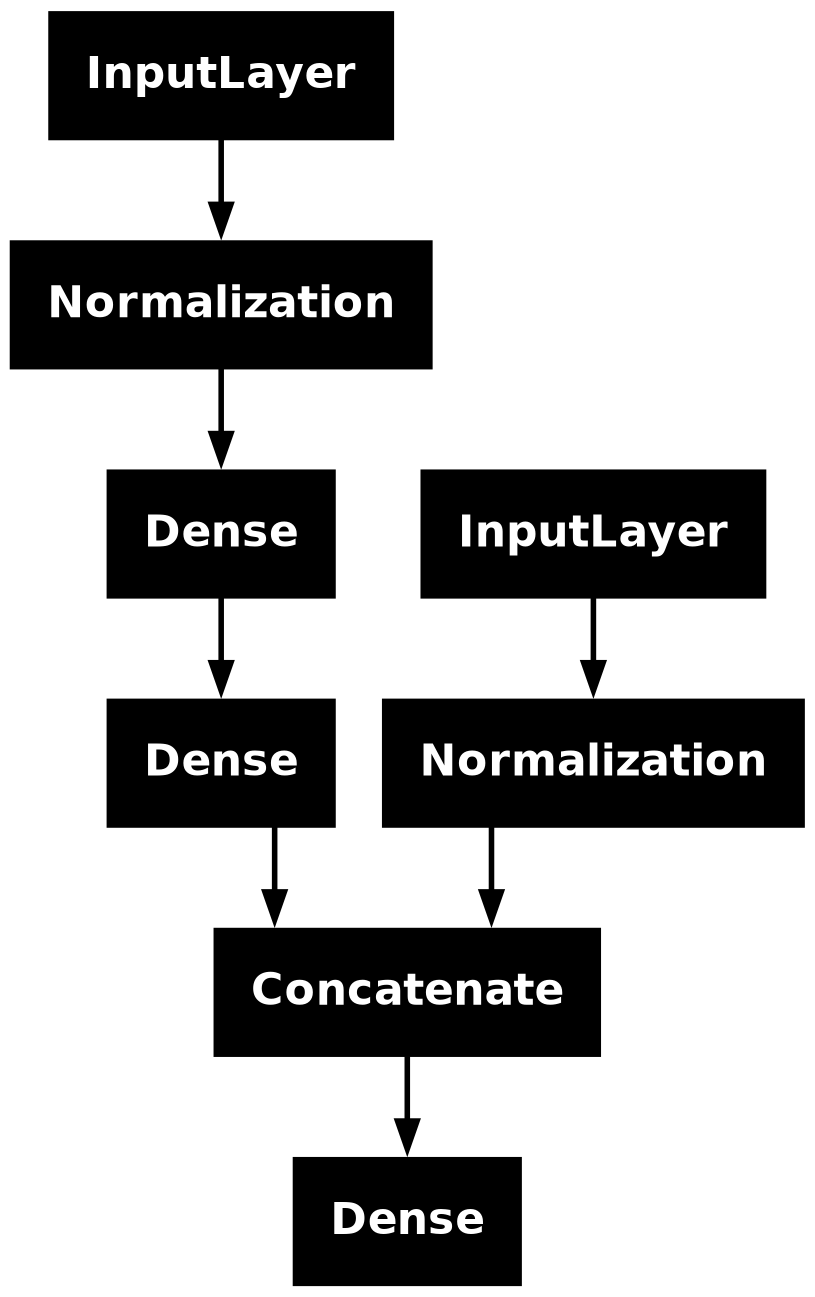

In [42]:
tf.keras.utils.plot_model(model)

In [43]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3),
    metrics= ['RootMeanSquaredError'],
    loss= 'mse'
)

In [44]:
X_train_wide, X_train_deep = X_train_housing[:, :5], X_train_housing[:, 2:]
X_test_wide, X_test_deep = X_test_housing[:, :5], X_test_housing[:, 2:]

In [45]:
norm_wide_layer.adapt(X_train_wide)
norm_deep_layer.adapt(X_train_deep)

In [46]:
history = model.fit(
    x= (X_train_wide, X_train_deep),
    y= y_train_housing,
    epochs= 20,
    validation_split= 0.1
)

Epoch 1/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 235948.8750 - loss: 55672909824.0000 - val_RootMeanSquaredError: 240093.3281 - val_loss: 57644806144.0000
Epoch 2/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 234782.9844 - loss: 55124037632.0000 - val_RootMeanSquaredError: 236196.2969 - val_loss: 55788691456.0000
Epoch 3/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 229641.5312 - loss: 52737007616.0000 - val_RootMeanSquaredError: 226928.2031 - val_loss: 51496411136.0000
Epoch 4/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 219029.6094 - loss: 47977996288.0000 - val_RootMeanSquaredError: 212081.2812 - val_loss: 44978466816.0000
Epoch 5/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 203262.1250 - loss: 41322549248.0000 - val_RootMeanSquaredError: 193068.1562 - val_loss: 37275316224.0000
Epoch 6/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 184212.2031 - 

In [47]:
model.evaluate({'input_wide': X_test_wide, 'input_deep': X_test_deep}, y_test_housing)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 91106.6328 - loss: 8308734976.0000


[7895676928.0, 88857.6171875]

In [48]:
norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(30, activation= 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation= 'relu')

concat_layer = tf.keras.layers.Concatenate()

output_layer = tf.keras.layers.Dense(1, name= 'out')
aux_output_layer = tf.keras.layers.Dense(1, name= 'aux_out')

input_wide = tf.keras.layers.Input(shape= [5], name= 'input_wide')
input_deep = tf.keras.layers.Input(shape= [6], name= 'input_deep')

norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)

hidden_1 = hidden_layer1(norm_deep)
hidden_2 = hidden_layer2(hidden_1)

concat = concat_layer([hidden_2, norm_wide])

output = output_layer(concat)
aux_output = aux_output_layer(hidden_2)

model = tf.keras.Model(inputs= [input_wide, input_deep], outputs= [output, aux_output])

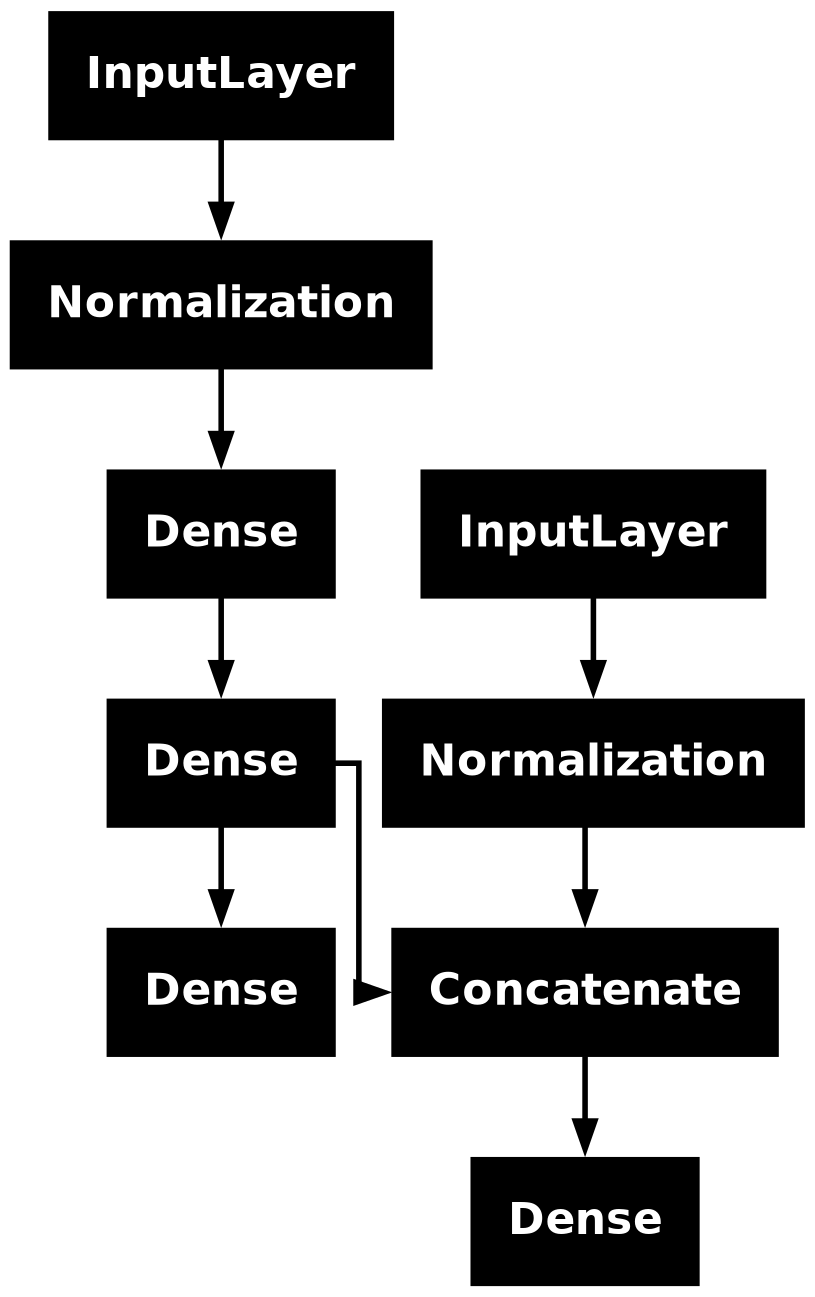

In [49]:
tf.keras.utils.plot_model(model)

In [50]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_deep          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 6)         │         13 │ input_deep[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 30)        │        210 │ normalization_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_wide          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 30)        │        930 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 5)         │         11 │ input_wide[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ dense_14[0][0],   │
│ (Concatenate)       │                   │            │ normalization_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ out (Dense)         │ (None, 1)         │         36 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_out (Dense)     │ (None, 1)         │         31 │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

In [51]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3),
    metrics= ['RootMeanSquaredError', 'RootMeanSquaredError'],
#     loss= ['mse', 'mse'],
#     loss_weights= [0.9, 0.1]
    loss= {'out': 'mse', 'aux_out': 'mse'},
    loss_weights= {'out': 0.9, 'aux_out': 0.1}
)

In [52]:
norm_wide_layer.adapt(X_train_wide)
norm_deep_layer.adapt(X_train_deep)

In [53]:
history = model.fit(
    x= {
        'input_wide': X_train_wide,
        'input_deep': X_train_deep
    },
    y= {
        'out': y_train_housing,
        'aux_out': y_train_housing
    },
    epochs= 10,
    validation_split= 0.1
)

Epoch 1/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - aux_out_RootMeanSquaredError: 235947.0312 - loss: 55668035584.0000 - out_RootMeanSquaredError: 235937.6250 - val_aux_out_RootMeanSquaredError: 240014.1875 - val_loss: 57564962816.0000 - val_out_RootMeanSquaredError: 239917.2969
Epoch 2/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_out_RootMeanSquaredError: 234583.9688 - loss: 54964977664.0000 - out_RootMeanSquaredError: 234428.2656 - val_aux_out_RootMeanSquaredError: 235175.9375 - val_loss: 55149277184.0000 - val_out_RootMeanSquaredError: 234801.3750
Epoch 3/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_out_RootMeanSquaredError: 228186.1094 - loss: 51882549248.0000 - out_RootMeanSquaredError: 227725.5938 - val_aux_out_RootMeanSquaredError: 223355.3750 - val_loss: 49579175936.0000 - val_out_RootMeanSquaredError: 222586.8594
Epoch 4/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_out_RootMeanSquaredError: 214764.4531 - loss: 45799378944.0000 - out_RootMeanSquaredError: 21390

In [54]:
model.evaluate(
    x= {
        'input_wide': X_test_wide,
        'input_deep': X_test_deep
    },
    y= {
        'out': y_test_housing,
        'aux_out': y_test_housing
    },
    return_dict= True
)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_out_RootMeanSquaredError: 118078.2031 - loss: 13899482112.0000 - out_RootMeanSquaredError: 117849.5234


{'aux_out_RootMeanSquaredError': 116307.53125,
 'loss': 13476388864.0,
 'out_RootMeanSquaredError': 116063.3984375}

In [55]:
y_pred_main, y_pred_aux = model.predict({
    'input_wide': X_test_wide[:3],
    'input_deep': X_test_deep[:3]
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


In [56]:
y_pred_main

array([[146717.94 ],
       [104316.336],
       [177158.62 ]], dtype=float32)

In [57]:
y_pred_aux

array([[145389.48],
       [103365.68],
       [175551.97]], dtype=float32)

## Using the Subclassing API to Build Dynamic Models
we can have these in the model: for loops, if statements, low-level TensorFlow

In [58]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(
        self, 
        *,
        units: int = 30, 
        activation: str | Callable = 'relu', 
        **kwargs
    ) -> None:
        super().__init__()
        self.norm_wide_layer = tf.keras.layers.Normalization()
        self.norm_deep_layer = tf.keras.layers.Normalization()
        self.hidden_layer1 = tf.keras.layers.Dense(units, activation= activation)
        self.hidden_layer2 = tf.keras.layers.Dense(units, activation= activation)
        self.concat_layer = tf.keras.layers.Concatenate()
        self.output_layer = tf.keras.layers.Dense(1, name= 'out')
        self.aux_output_layer = tf.keras.layers.Dense(1, name= 'aux_out')

    def call(self, inputs: tuple[tf.Tensor, tf.Tensor]) -> tuple[tf.Tensor, tf.Tensor]:
        input_wide, input_deep = inputs

        norm_wide = self.norm_wide_layer(input_wide)
        norm_deep = self.norm_deep_layer(input_deep)
        hidden_1 = self.hidden_layer1(norm_deep)
        hidden_2 = self.hidden_layer2(hidden_1)
        concat = self.concat_layer([hidden_2, norm_wide])
        output = self.output_layer(concat)
        aux_output = self.aux_output_layer(hidden_2)

        return output, aux_output

In [59]:
model = WideAndDeepModel(name= 'subclassing_model')

In [60]:
model.call((X_train_wide, X_train_deep))

(<tf.Tensor: shape=(16512, 1), dtype=float32, numpy=
 array([[193.8257 ],
        [ 77.02707],
        [185.73535],
        ...,
        [371.95233],
        [699.6361 ],
        [243.671  ]], dtype=float32)>,
 <tf.Tensor: shape=(16512, 1), dtype=float32, numpy=
 array([[239.28304],
        [126.8425 ],
        [223.14992],
        ...,
        [364.49084],
        [692.2611 ],
        [261.43372]], dtype=float32)>)

In [61]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3),
    metrics= ['RootMeanSquaredError', 'RootMeanSquaredError'],
    loss = ['mse', 'mse'],
    loss_weights= [0.9, 0.1]
)

In [62]:
model.norm_wide_layer.adapt(X_train_wide)
model.norm_deep_layer.adapt(X_train_deep)

In [63]:
history = model.fit((X_train_wide, X_train_deep), (y_train_housing, y_train_housing))

516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 234443.5625 - RootMeanSquaredError_1: 234449.7969 - loss: 54967635968.0000



- compile, adapt, fit, evaluate, predict works the same. 
- now the model is inside the function so keras cannot inspect it, cannot clone it, cannot summarize.

## Saving and Restoring a Model

In [64]:
model.save('my_model.keras')

In [65]:
loaded_model = tf.keras.models.load_model(
    'my_model.keras', 
    custom_objects= {'WideAndDeepModel': WideAndDeepModel}
)

In [66]:
model.save_weights('my_model.weights.h5')

In [67]:
loaded_weights = model.load_weights('my_model.weights.h5')

## Using Callbacks
### checkpoint

In [68]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'my_checkpoints.weights.h5', 
    save_weights_only= True,
    save_best_only= True
)
history = model.fit(
    x= (X_train_wide, X_train_deep), 
    y= (y_train_housing, y_train_housing), 
    epochs= 20, 
    callbacks= checkpoint_cb,
    validation_split= 0.1
)

Epoch 1/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 233644.8906 - RootMeanSquaredError_1: 233732.5156 - loss: 54595231744.0000 - val_RootMeanSquaredError: 232678.9375 - val_RootMeanSquaredError_1: 232856.7344 - val_loss: 54147751936.0000
Epoch 2/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 224927.1250 - RootMeanSquaredError_1: 225139.7969 - loss: 50605596672.0000 - val_RootMeanSquaredError: 217539.5781 - val_RootMeanSquaredError_1: 217872.5469 - val_loss: 47337975808.0000
Epoch 3/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 207994.2812 - RootMeanSquaredError_1: 208360.1875 - loss: 43286081536.0000 - val_RootMeanSquaredError: 194870.9062 - val_RootMeanSquaredError_1: 195353.1719 - val_loss: 37993488384.0000
Epoch 4/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 184727.3125 - RootMeanSquaredError_1: 185219.9688 - loss: 34155911168.0000 - val_RootMeanSquaredError: 168964.3438 - val_RootMeanSquaredEr

### Early stopping

In [69]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience= 5,
    restore_best_weights= True
)
history = model.fit(
    x= (X_train_wide, X_train_deep), 
    y= (y_train_housing, y_train_housing), 
    epochs= 50, 
    callbacks= [checkpoint_cb, early_stopping],
    validation_split= 0.1
)

Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 79358.2656 - RootMeanSquaredError_1: 79359.0156 - loss: 6299238400.0000 - val_RootMeanSquaredError: 78719.2656 - val_RootMeanSquaredError_1: 78720.1016 - val_loss: 6196737024.0000
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 78401.0469 - RootMeanSquaredError_1: 78401.8750 - loss: 6148096000.0000 - val_RootMeanSquaredError: 78065.0625 - val_RootMeanSquaredError_1: 78065.9453 - val_loss: 6094169088.0000
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 77702.9844 - RootMeanSquaredError_1: 77703.8672 - loss: 6039036928.0000 - val_RootMeanSquaredError: 77566.5078 - val_RootMeanSquaredError_1: 77567.4609 - val_loss: 6016580096.0000
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 77185.3516 - RootMeanSquaredError_1: 77186.2891 - loss: 5958798336.0000 - val_RootMeanSquaredError: 77175.2031 - val_RootMeanSquaredError_1: 77176.2188 - va

### Custom callback

In [70]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"\nEpoch={epoch}, val/train={ratio:.2f}")

Can make similar functions like this for fit, evaluate, and predict:
- fit: on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end()
- predict: on_predict_begin(), on_predict_end(), on_predict_batch_begin(), or on_predict_batch_end()
- evaluate: on_test_begin(),on_test_end(), on_test_batch_begin(), or on_test_batch_end()

In [71]:
history = model.fit(
    x= (X_train_wide, X_train_deep), 
    y= (y_train_housing, y_train_housing), 
    callbacks= CustomCallback(),
    validation_split= 0.1,
    epochs= 5
)

Epoch 1/5
444/465 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 74251.1875 - RootMeanSquaredError_1: 74254.0312 - loss: 5514278912.0000
Epoch=0, val/train=0.98
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 74286.5078 - RootMeanSquaredError_1: 74289.3516 - loss: 5519503360.0000 - val_RootMeanSquaredError: 74304.8359 - val_RootMeanSquaredError_1: 74307.7734 - val_loss: 5521252352.0000
Epoch 2/5
442/465 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 74237.5547 - RootMeanSquaredError_1: 74240.4297 - loss: 5512252928.0000
Epoch=1, val/train=0.98
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 74276.2734 - RootMeanSquaredError_1: 74279.1406 - loss: 5517979136.0000 - val_RootMeanSquaredError: 74292.3203 - val_RootMeanSquaredError_1: 74295.2969 - val_loss: 5519393280.0000
Epoch 3/5
443/465 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 74229.1250 - RootMeanSquaredError_1: 74232.0469 - loss: 5511000064.0000
Epoch=2, val/train=0.

## Using TensorBoard for Visualization

In [72]:
%load_ext tensorboard
%tensorboard --logdir='/kaggle/working/logs' 

In [73]:
tensorboard_cb = tf.keras.callbacks.TensorBoard('/kaggle/working/logs', profile_batch= (100, 200), histogram_freq= 1)

In [74]:
model_clf = tf.keras.Sequential()
model_clf.add(tf.keras.layers.Input(shape= [28, 28]))
model_clf.add(tf.keras.layers.Flatten())
model_clf.add(tf.keras.layers.Dense(300, activation= 'relu'))
model_clf.add(tf.keras.layers.Dense(100, activation= 'relu'))
model_clf.add(tf.keras.layers.Dense(10, activation= 'softmax'))

model_clf.compile(
    optimizer= 'sgd', 
    metrics= ['accuracy'], 
    loss= 'sparse_categorical_crossentropy'
)

history = model_clf.fit(
    X_train, 
    y_train, 
    epochs = 30, 
    validation_split= 0.1,
    callbacks= [tensorboard_cb]
)

Epoch 1/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6806 - loss: 1.0288 - val_accuracy: 0.8111 - val_loss: 0.5508
Epoch 2/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8205 - loss: 0.5211 - val_accuracy: 0.8316 - val_loss: 0.4865
Epoch 3/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8391 - loss: 0.4631 - val_accuracy: 0.8415 - val_loss: 0.4566
Epoch 4/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8507 - loss: 0.4317 - val_accuracy: 0.8507 - val_loss: 0.4365
Epoch 5/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8588 - loss: 0.4093 - val_accuracy: 0.8558 - val_loss: 0.4217
Epoch 6/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8646 - loss: 0.3912 - val_accuracy: 0.8609 - val_loss: 0.4102
Epoch 7/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8678 - loss: 0.3768 - val_accuracy: 0.8647 - val_loss: 0.4000
Epoch 8/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8729 - loss: 0.3646 - 

In [75]:
writer = tf.summary.create_file_writer('/kaggle/working/logs/lower_level')

with writer.as_default():
    for step in range(1, 1001):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100 # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000 # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-Tuning Neural Network Hyperparameters

In [76]:
def build_model(hp: kt.HyperParameters) -> tf.keras.Model:
    n_hidden = hp.Int('n_hidden', min_value= 0, max_value= 8, default= 2)
    n_nuerons = hp.Int('n_nuerons', min_value= 16, max_value= 256)
    learning_rate= hp.Float('learning_rate', min_value= 1e-4, max_value= 1e-2)

    optimizer = hp.Choice('optimizer', values= ['sgd', 'adam'])
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate= learning_rate)

    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())

    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_nuerons, activation= 'relu'))

    model.add(tf.keras.layers.Dense(10, activation= 'softmax'))
    model.compile(
        optimizer= optimizer,
        metrics= ['accuracy'], 
        loss= 'sparse_categorical_crossentropy'
    )

    return model

In [77]:
rnd_search_tuner = kt.RandomSearch(
    build_model,
    objective= 'val_accuracy',
    max_trials= 5,
    overwrite= True,
    directory= 'my_fashion_mnist',
    project_name= 'my_random_search',
    seed= 42
)

In [78]:
rnd_search_tuner.search(
    X_train,
    y_train,
    epochs= 10,
    validation_data= (X_valid, y_valid)
)

Trial 5 Complete [00h 00m 30s]
val_accuracy: 0.8568000197410583

Best val_accuracy So Far: 0.859000027179718
Total elapsed time: 00h 02m 37s


In [79]:
top_3_models = rnd_search_tuner.get_best_models(num_models= 3)

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [80]:
top_3_models[0]

<Sequential name=sequential, built=True>

In [81]:
top_3_hp = rnd_search_tuner.get_best_hyperparameters(num_trials= 3)

In [82]:
top_3_hp[0].values

{'n_hidden': 8,
 'n_nuerons': 37,
 'learning_rate': 0.009662599961446946,
 'optimizer': 'sgd'}

In [83]:
best_trial = rnd_search_tuner.oracle.get_best_trials(num_trials= 1)[0]

In [84]:
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_nuerons: 37
learning_rate: 0.009662599961446946
optimizer: sgd
Score: 0.859000027179718


In [85]:
best_trial.metrics.get_last_value('val_accuracy')

0.859000027179718

In [86]:
best_model = rnd_search_tuner.get_best_models(num_models= 1)[0]
best_model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8714 - loss: 0.3511
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8754 - loss: 0.3412
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8785 - loss: 0.3326
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8818 - loss: 0.3251
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8842 - loss: 0.3184
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 0.3116
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8887 - loss: 0.3059
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8911 - loss: 0.2999
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8928 - loss: 0.2955
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8947 - loss: 0.2903


In [87]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8617 - loss: 0.4049


In [88]:
test_loss

0.40730834007263184

In [89]:
test_accuracy

0.8593999743461609

In [90]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp: kt.HyperParameters) -> tf.keras.Model:
        n_hidden = hp.Int('n_hidden', min_value= 0, max_value= 8, default= 2)
        n_nuerons = hp.Int('n_nuerons', min_value= 16, max_value= 256)
        learning_rate = hp.Float('learning_rate', min_value= 1e-4, max_value= 1e-2)
    
        optimizer = hp.Choice('optimizer', values= ['sgd', 'adam'])
        if optimizer == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate= learning_rate)
    
        else:
            optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate)
    
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Flatten())
    
        for _ in range(n_hidden):
            model.add(tf.keras.layers.Dense(n_nuerons, activation= 'relu'))
    
        model.add(tf.keras.layers.Dense(10, activation= 'softmax'))
        model.compile(
            optimizer= optimizer,
            metrics= ['accuracy'], 
            loss= 'sparse_categorical_crossentropy'
        )
    
        return model

    def fit(
        self, 
        hp: kt.HyperParameters, 
        model: tf.keras.Model, 
        X: ArrayLike, 
        y: ArrayLike, 
        **kwargs
    ) -> tf.keras.callbacks.History:
        if hp.Boolean('normalize'):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)

        return model.fit(X, y, **kwargs)

We can pass this class to any tuner.

In [91]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()   # because the previous one was already normalized

In [92]:
hyperband_tuner = kt.Hyperband(
    hypermodel= MyClassificationHyperModel(),
    objective= 'val_accuracy',
    max_epochs= 10,
    factor= 3,
    hyperband_iterations= 2,
    seed= 42,
    overwrite= True,
    project_name= 'my_hyperband',
    directory= 'my_fashion_mnist'
)

In [93]:
root_logdir = hyperband_tuner.project_dir + '/tensorboard'

In [94]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir, histogram_freq= 1)
early_stopping = tf.keras.callbacks.EarlyStopping(patience= 5, restore_best_weights= True)

hyperband_tuner.search(
    X_train,
    y_train,
    epochs= 10,
    validation_split= 0.1,
    callbacks= [tensorboard_cb, early_stopping]
)

Trial 60 Complete [00h 00m 23s]
val_accuracy: 0.10316666960716248

Best val_accuracy So Far: 0.8730000257492065
Total elapsed time: 00h 18m 37s


In [96]:
bayesian_tuner = kt.BayesianOptimization(
    hypermodel= MyClassificationHyperModel(),
    objective= 'val_accuracy',
    max_trials= 10,
    alpha= 1e-4,    # default
    beta= 2.6,      # default
    seed= 42,
    overwrite= True,
    project_name= 'my_bayesian_opt',
    directory= 'my_fashion_mnist'
)

bayesian_tuner.search(
    X_train,
    y_train,
    epochs= 10,
    validation_split= 0.1
)

Trial 10 Complete [00h 00m 31s]
val_accuracy: 0.8631666898727417

Best val_accuracy So Far: 0.8631666898727417
Total elapsed time: 00h 05m 01s


In [97]:
# tensorboard doesn't work on kaggle so I'm downloading the file and visualizing on my system.
import subprocess

subprocess.run(["zip", "-r", "working_dir.zip", "/kaggle/working"], stdout= subprocess.DEVNULL)

CompletedProcess(args=['zip', '-r', 'working_dir.zip', '/kaggle/working'], returncode=0)